# Cloudy models of NGC 346 bow shock around Walborn 3

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import cmasher as cmr
import astropy.units as u
from pathlib import Path
import sys
from cloudytab import cloudytab

In [3]:
cloudytab?

Type:        module
String form: <module 'cloudytab.cloudytab' from '/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/cloudytab/cloudytab.py'>
File:        ~/miniconda3/envs/py39/lib/python3.9/site-packages/cloudytab/cloudytab.py
Docstring:   <no docstring>

In [4]:
sns.set_context("talk")
sns.set_color_codes()

In [5]:
ROOT = Path.cwd().parent.parent
m1 = cloudytab.CloudyModel(ROOT / "cloudy/models/w3-n010")
m2 = cloudytab.CloudyModel(ROOT / "cloudy/models/w3-n010-p")
m3 = cloudytab.CloudyModel(ROOT / "cloudy/models/w3-n030-p")

In [6]:
m1.data.keys()

dict_keys(['Si', 'C', 'gdrift', 'ovr', 'Ne', 'Ar', 'gpot', 'gcont', 'phys', 'Cl', 'lina', 'gcharge', 'S', 'gabun', 'emis', 'O', 'N', 'cont', 'pre', 'gtemp', 'rad', 'lya'])

KeyError: 'rad'

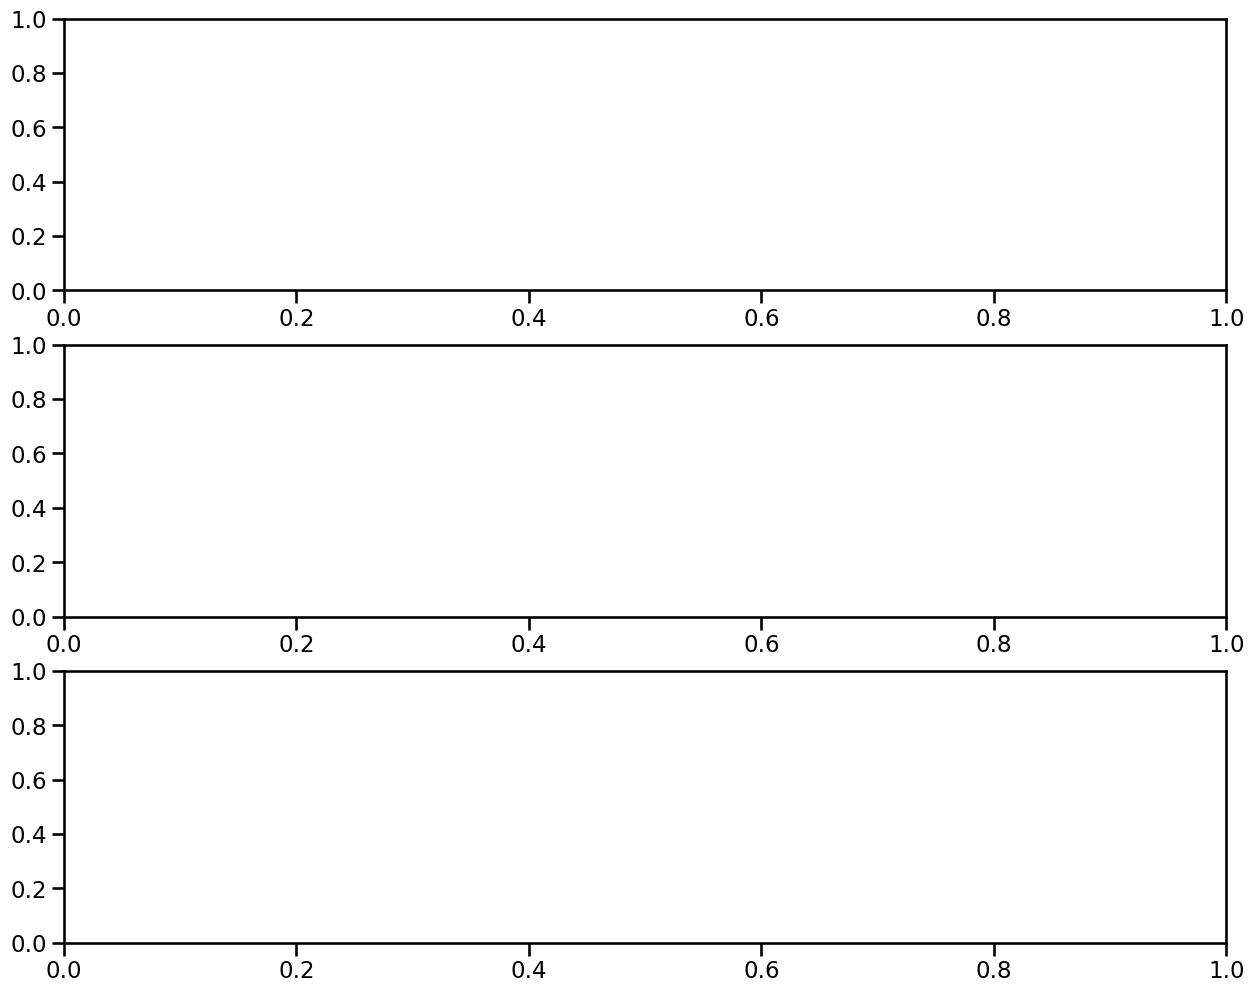

In [5]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12))


# colnames = m.data["emis"].colnames[1:]

embands = [
 'He 2 4685.70A',
 'Ar 4 4740.12A',
 'Ne 3 3868.76A',
 'O  3 5006.84A',
 'Blnd 5875.66A',
 'Ar 3 7135.79A',
 'H  1 4861.33A',
 'Ca B 6562.82A',
 'O  2 7319.99A',
]

# Take N colors from named colormap in [0.15, 0.85] range in HEX
colors = cmr.take_cmap_colors(
    'cmr.neon', 
    len(embands), 
    cmap_range=(0.15, 0.85), 
    return_fmt='hex'
)

for m, ax in zip([m1, m2, m3], axes):
    radius = m.data["rad"]["radius"] * u.cm.to(u.pc) 
    hb = m.data["emis"]['H  1 4861.33A'] 
    for emband, color in zip(embands, colors):
        em = m.data["emis"][emband] 
        ax.plot(radius, em / hb.max(), label=emband, color=color)
    ax.set(
        yscale="log",
        ylim=[0.001, 10.1],
        xlabel="Radius, pc",
        ylabel="Emissivity",
    )
axes[0].legend(ncol=3)
axes[0].set_title("Constant density, n = 10")
axes[1].set_title("Constant pressure, n = 10")
axes[2].set_title("Constant pressure, n = 30")
sns.despine()
fig.tight_layout();

In [ ]:
class C:
    def __init__(self, d):
        for k, v in d.items():
            setattr(self, k, v.to_pandas())

In [ ]:
m1.p = C(m1.data)
m2.p = C(m2.data)
m3.p = C(m3.data)

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12))
for m, ax in zip([m1, m2, m3], axes):
    m.radius = m.p.rad.radius * u.cm.to(u.pc) 
    ax.plot(m.radius, m.p.ovr.eden, label="eden")
    ax.plot(m.radius, m.p.ovr.hden * m.p.ovr.HII, label="H II")
    ax.plot(m.radius, m.p.ovr.hden * m.p.ovr.HeII, label="He II")
    ax.plot(m.radius, m.p.ovr.hden * m.p.ovr.HeIII, label="He III")
    ax.plot(m.radius, m.p.ovr.hden * m.p.Ar["Ar+3"], label="Ar IV")
    ax.plot(m.radius, m.p.ovr.hden * m.p.Ne["Ne+2"], label="Ne III")
    ax.plot(m.radius, m.p.ovr.hden * m.p.O["O+2"], label="O III")
    ax.plot(m.radius, 0.001 * m.p.ovr.Te, label="Te, kK")
axes[0].legend(ncol=3)
axes[0].set_title("Constant density, n = 10")
axes[1].set_title("Constant pressure, n = 10")
axes[2].set_title("Constant pressure, n = 30")
axes[-1].set(
    xlabel="Radius, pc",
)
sns.despine()
fig.tight_layout();

In [ ]:
m.p.Ar

In [ ]:
m.p.cont

In [ ]:
import astropy.constants as const

In [ ]:
wavnorm = (const.h * const.c / u.rydberg).to(u.micron)
freqnorm = (u.rydberg / const.h).to(u.Hz)
sednorm = (u.erg / u.s) / const.L_sun.cgs
#m.p.cont["Cont  nu"] * wavnorm 
wavs = wavnorm / m1.data["cont"]["Cont  nu"]
freqs = freqnorm * m1.data["cont"]["Cont  nu"]
sednorm

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(wavs, sednorm * m3.data["cont"]["incident"])
ax.plot(wavs, sednorm * m3.data["cont"]["DiffOut"])
ax.plot(wavs, sednorm * m3.data["cont"]["trans"])

ax.axvline(24.0, lw=5, color="k", alpha=0.3)
ax.axvspan(0, 0.0912/4, lw=0, color="r", alpha=0.3)
ax.set(
    xscale="log",
    yscale="log",
    xlim=[1e-2, 1e3],
    ylim=[1.0, 1e7],
    xlabel="Wavelength, micron",
    ylabel=r"$\nu L_\nu$, L$_\odot$",
)
sns.despine()
fig.tight_layout();

In [ ]:
m4 = cloudytab.CloudyModel("../cloudy/models/w3-n010-p-r08")
m5 = cloudytab.CloudyModel("../cloudy/models/w3-n005-p-r08")
m6 = cloudytab.CloudyModel("../cloudy/models/w3-n100-p-r08")
m7 = cloudytab.CloudyModel("../cloudy/models/w3-n050-p-r08")
m8 = cloudytab.CloudyModel("../cloudy/models/w3-n010-d01-r08")

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(wavs, sednorm * m4.data["cont"]["incident"])
ax.plot(wavs, sednorm * m4.data["cont"]["DiffOut"])
ax.plot(wavs, sednorm * m1.data["cont"]["DiffOut"])
ax.plot(wavs, sednorm * m8.data["cont"]["DiffOut"])
ax.plot(wavs, sednorm * m4.data["cont"]["trans"])

ax.axvline(24.0, lw=5, color="k", alpha=0.3)
ax.axvspan(0, 0.0912/4, lw=0, color="r", alpha=0.3)
ax.set(
    xscale="log",
    yscale="log",
    xlim=[1e-2, 1e3],
    ylim=[1.0, 1.0e7],
    xlabel="Wavelength, micron",
    ylabel=r"$\nu L_\nu$, L$_\odot$",
)
sns.despine()
fig.tight_layout();

In [ ]:
for m in m4, m5, m6, m7, m8:
    m.p = C(m.data)

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)
for m, ax in zip([m4, m7, m8], axes):
    m.radius = m.p.rad.radius * u.cm.to(u.pc) 
    ax.plot(m.radius, m.p.ovr.eden, label="eden")
    ax.plot(m.radius, m.p.ovr.hden * m.p.ovr.HII, label="H II")
    ax.plot(m.radius, m.p.ovr.hden * m.p.ovr.HeII, label="He II")
    ax.plot(m.radius, m.p.ovr.hden * m.p.ovr.HeIII, label="He III")
    ax.plot(m.radius, m.p.ovr.hden * m.p.Ar["Ar+3"], label="Ar IV")
    ax.plot(m.radius, m.p.ovr.hden * m.p.Ne["Ne+2"], label="Ne III")
    ax.plot(m.radius, m.p.ovr.hden * m.p.O["O+2"], label="O III")
    ax.plot(m.radius, 0.001 * m.p.ovr.Te, label="Te, kK")
axes[-1].legend(ncol=3)
axes[0].set_title("Constant pressure, n = 10, Rmax = 8 pc")
axes[1].set_title("Constant pressure, n = 50, Rmax = 8 pc")
axes[2].set_title("Density law $r^{-1}$, n = 10, Rmax = 8 pc")
axes[-1].set(
    xlabel="Radius, pc",
)
sns.despine()
fig.tight_layout();

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)


# colnames = m.data["emis"].colnames[1:]

embands = [
 'He 2 4685.70A',
 'Ar 4 4740.12A',
 'Ne 3 3868.76A',
 'O  3 5006.84A',
 'Blnd 5875.66A',
 'Ar 3 7135.79A',
 'H  1 4861.33A',
 'Ca B 6562.82A',
 'O  2 7319.99A',
]

# Take N colors from named colormap in [0.15, 0.85] range in HEX
colors = cmr.take_cmap_colors(
    'cmr.neon', 
    len(embands), 
    cmap_range=(0.15, 0.85), 
    return_fmt='hex'
)

for m, ax in zip([m4, m7, m8], axes):
    radius = m.data["rad"]["radius"] * u.cm.to(u.pc) 
    hb = m.data["emis"]['H  1 4861.33A'] 
    for emband, color in zip(embands, colors):
        em = m.data["emis"][emband] 
        ax.plot(radius, em / hb.max(), label=emband, color=color)
    ax.set(
        yscale="log",
        ylim=[0.001, 10.1],
        xlabel="Radius, pc",
        ylabel="Emissivity",
    )
axes[0].legend(ncol=3)
axes[0].set_title("Constant pressure, n = 10, Rmax = 8 pc")
axes[1].set_title("Constant pressure, n = 50, Rmax = 8 pc")
axes[2].set_title("Density law $r^{-1}$, n = 10, Rmax = 8 pc")
sns.despine()
fig.tight_layout();

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)


# colnames = m.data["emis"].colnames[1:]

embands = [
 'He 2 4685.70A',
 'Ar 4 4740.12A',
 'Ne 3 3868.76A',
 'O  3 5006.84A',
 'Blnd 5875.66A',
 'Ar 3 7135.79A',
 'H  1 4861.33A',
 'Ca B 6562.82A',
 'O  2 7319.99A',
]

# Take N colors from named colormap in [0.15, 0.85] range in HEX
colors = cmr.take_cmap_colors(
    'cmr.neon', 
    len(embands), 
    cmap_range=(0.15, 0.85), 
    return_fmt='hex'
)

for m, ax in zip([m4, m7, m8], axes):
    radius = m.data["rad"]["radius"] * u.cm.to(u.pc) 
    hb = m.data["emis"]['H  1 4861.33A'] 
    for emband, color in zip(embands, colors):
        em = m.data["emis"][emband] 
        ax.plot(radius, em / em.max(), label=emband, color=color)
    ax.set(
        yscale="linear",
        ylim=[0.00, 1.1],
        xlabel="Radius, pc",
        ylabel="Emissivity",
    )
axes[0].legend(ncol=3)
axes[0].set_title("Constant pressure, n = 10, Rmax = 8 pc")
axes[1].set_title("Constant pressure, n = 50, Rmax = 8 pc")
axes[2].set_title("Density law $r^{-1}$, n = 10, Rmax = 8 pc")
sns.despine()
fig.tight_layout();

## Brightness versus projected radius in spherical symmetry

First approximation to bow shock shape is that it is a hemisphere

Therefore at each projected radius $b$, the brightness is given by:
$$
S(b) = \int_{-\infty}^\infty j(r) \, dz
$$
where
$$
r^2 = b^2 + z^2 
\quad \Rightarrow \quad
2 r\, dr = 2 z\, dz
\quad \Rightarrow \quad
dz = \frac{r}{z}\, dr
$$
Therefore
$$
S(b) = 2 \int_b^\infty j(r) \, \frac{r}{(r^2 - b^2)^{1/2}} \, dr
$$

In [ ]:
nb = 200
def brightness(r, dr, e, nb):
    b = np.linspace(0.0, r.max(), nb)
    _r = np.linspace(0.0, r.max(), 3 * nb + 5)
    _e = np.interp(_r, r, e, left=0.0, right=0.0)
    nr = len(_r)
    _dr = [r.max() / nr] * nr
    bgrid = np.stack([b] * nr, axis=0)
    rgrid = np.stack([_r] * nb, axis=1)
    egrid = np.stack([_e] * nb, axis=1)
    drgrid = np.stack([_dr] * nb, axis=1)
    rgrid[rgrid <= bgrid] = np.nan
    sb = 2 * np.nansum(egrid * rgrid * drgrid / (drgrid + np.sqrt(rgrid**2 - bgrid**2)), axis=0)
    return b, sb

In [ ]:
m = m8
r = m.data["rad"]["radius"]
dr = m.data["rad"]["dr"]
e = m.data["emis"]["He 2 4685.70A"]
b, s = brightness(r, dr, e, nb)
s

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)


# colnames = m.data["emis"].colnames[1:]

embands = [
 'He 2 4685.70A',
 'Ar 4 4740.12A',
 'Ne 3 3868.76A',
 'O  3 5006.84A',
 'Blnd 5875.66A',
 'Ar 3 7135.79A',
 'H  1 4861.33A',
 'Ca B 6562.82A',
 'O  2 7319.99A',
]

# Take N colors from named colormap in [0.15, 0.85] range in HEX
colors = cmr.take_cmap_colors(
    'cmr.neon', 
    len(embands), 
    cmap_range=(0.15, 0.85), 
    return_fmt='hex'
)

for m, ax in zip([m4, m7, m8], axes):
    r = m.data["rad"]["radius"]
    dr = m.data["rad"]["dr"]
    nb = 200
    for emband, color in zip(embands, colors):
        em = m.data["emis"][emband]
        b, sb = brightness(r, dr, em, nb)
        radius = b * u.cm.to(u.pc) 
        ax.plot(radius, sb / sb.max(), label=emband, color=color)
    ax.set(
        yscale="linear",
        ylim=[0.00, 1.1],
        xlabel="Radius, pc",
        ylabel="Surface brightness",
    )
axes[0].legend(ncol=3)
axes[0].set_title("Constant pressure, n = 10, Rmax = 8 pc")
axes[1].set_title("Constant pressure, n = 50, Rmax = 8 pc")
axes[2].set_title("Density law $r^{-1}$, n = 10, Rmax = 8 pc")
sns.despine()
fig.tight_layout();